In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
corsiAcq = geopandas.read_file("/content/drive/MyDrive/Corsi_acqua_Piano_di_Gestione.zip")
corsiAcq.head()


In [ ]:
prov= geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")

In [ ]:
comu = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")

1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [ ]:
milano = prov[prov["DEN_UTS"] == "Milano"]
milano

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."


2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

In [ ]:
corsiMil = corsiAcq[corsiAcq.within(milano.geometry.squeeze())]
corsiMilLunghi = corsiMil.nlargest(10, "SHAPE_LEN")
corsiMilLunghi

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
1,191,IT03POTI3SNCA1LO,artificiale,Lombardia,Scolmatore Piene Nord - Ovest (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,34035.857991,"MULTILINESTRING ((494060.091 5029696.046, 4940..."
32,398,IT03POTI3NPCA1LO,artificiale,Lombardia,Naviglio Pavese (Canale),nd,None,sì,no,sì,no,no,no,no,no,no,no,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,33448.858573,"LINESTRING (513927.378 5033222.100, 513927.258..."
35,565,IT03POAD3VACA1LO,artificiale,Lombardia,Vailata (Roggia),nd,None,sì,no,sì,no,no,no,no,no,no,sì,ADDA,no,no,sufficiente,media,non buono,media,2012-2014,2012-2014,buono al 2021,buono al 2021,Art. 4.4 per obiettivo ecologico e chimico,20751.104448,"LINESTRING (541818.985 5047325.989, 541818.901..."
3,252,IT03N008044003021LO,naturale,Lombardia,Garbogera (Torrente),Lambro (Asta),06IN7N,sì,no,sì,sì,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,19767.119220,"LINESTRING (509280.513 5047845.024, 509281.795..."
28,448,IT03N008001091014LO,naturale,Lombardia,Seveso (Torrente),Seveso,06SS3D,sì,no,sì,no,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,no,no,cattivo,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18469.448374,"LINESTRING (512157.688 5048463.394, 512157.976..."
6,282,IT03POLSRECA1LO,artificiale,Lombardia,Redefossi (Cavo),nd,06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18403.681560,"LINESTRING (514894.561 5036362.164, 514898.993..."
44,676,IT03N0080981411LO,naturale,Lombardia,Navigliaccio (Colatore),Ticino Sub Lacuale,06SS1N,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,NC,None,NC,None,2014,2014,buono al 2021,buono al 2021,Art. 4.4 per obiettivo ecologico e chimico,18105.747329,"LINESTRING (507915.612 5019743.337, 507917.175..."
27,358,IT03N008044002014LO,naturale,Lombardia,Olona (Fiume),Olona,06SS3D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,cattivo,alta,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,15816.452967,"LINESTRING (504109.620 5040607.275, 504113.432..."
33,428,IT03N0080590011LO,naturale,Lombardia,Carona (Roggia),Olona Meridionale,06SS1N,no,no,no,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,NC,None,NC,None,2014,2014,buono al 2021,buono al 2021,Art. 4.4 per obiettivo ecologico e chimico,15629.880279,"MULTILINESTRING ((507915.612 5019743.337, 5079..."


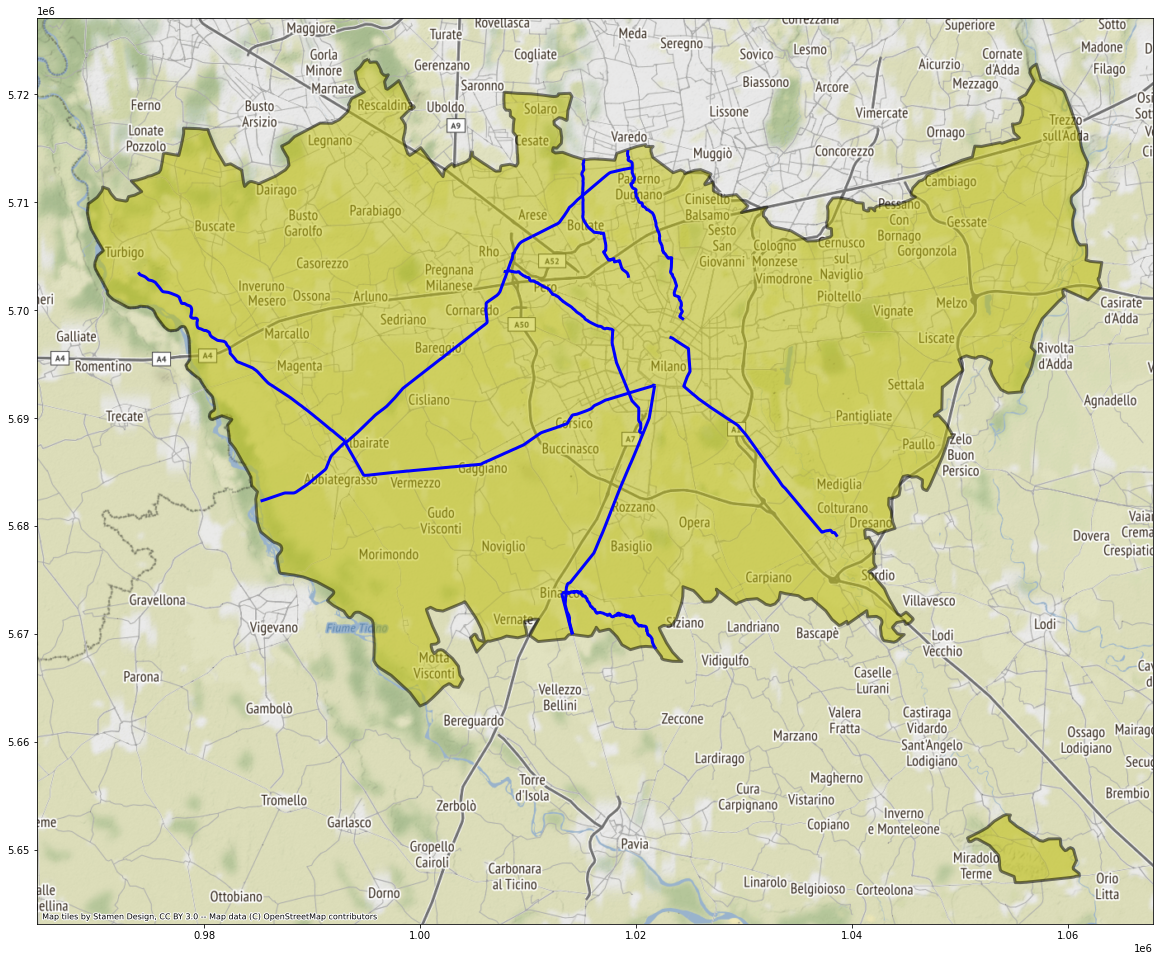

In [ ]:
ax = corsiMilLunghi.to_crs(epsg=3857).plot(figsize= (20, 20), edgecolor="b", linewidth=3)
milano.to_crs(epsg=3857).plot(ax=ax, facecolor= "y",alpha = 0.5, linewidth= 3, edgecolor= "k")
contextily.add_basemap(ax=ax)

In [ ]:
navigli = corsiAcq[corsiAcq["NOME"].str.contains("Navigl")]

fiumi = corsiAcq[corsiAcq.intersects(navigli.geometry.squeeze().unary_union)]

fiumi = fiumi[~fiumi["NOME"].str.contains("Navigl")]

In [ ]:
ax = milano.to_crs(epsg=3857).plot(figsize=(20,20), facecolor= "y",alpha = 0.3, linewidth= 3, edgecolor= "k")
navigli.to_crs(epsg=3857).plot(ax=ax, linewidth= 4, edgecolor= "g")
fiumi.to_crs(epsg=3857).plot(ax=ax, linewidth= 4, edgecolor= "b")
contextily.add_basemap(ax=ax)

3. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

In [ ]:
nomeCom = input("Inserisci il nome di un comune: ")
comune = comu[comu["COMUNE"] == nomeCom]
squeeze_comune = comune.geometry.squeeze()

corsiAttMil =  corsiAcq[corsiAcq.intersects(squeeze_comune)]
corsiAttMil

print("i parchi ospitati all'interno di questo comune sono: \n", corsiAttMil.NOME)

ax = comune.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "y",alpha = 0.3, edgecolor = "b", linewidth = 4)
corsiAttMil.to_crs(epsg = 3857).plot(ax = ax ,linewidth=4, edgecolor = "b" )
contextily.add_basemap(ax=ax)

4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

In [ ]:
nomFiu = input("Inserire il nome di un fiume: ")
fiume = corsiAcq[corsiAcq["NOME"] == nomFiu]
squeeze_fiume = fiume.geometry.squeeze()

comuni_attra_fiume =  comu[comu.intersects(squeeze_fiume)]
comuni_attra_fiume

ax = fiume.to_crs(epsg = 3857).plot(figsize=(20,20), edgecolor = "b", linewidth = 4)
comuni_attra_fiume.to_crs(epsg = 3857).plot(ax = ax, facecolor = "y", alpha = 0.3 ,linewidth=4, edgecolor = "k" )
contextily.add_basemap(ax=ax)


5. visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [ ]:
corsiAcqMil = corsiAcq[corsiAcq.within(milano.geometry.squeeze())]
lun_corsi_acqua_milano = corsiAcqMil.length
print(lun_corsi_acqua_milano)
ax = milano.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "y", alpha= 0.3, edgecolor = "b", linewidth = 4)
corsiAcqMil.to_crs(epsg = 3857).plot(ax = ax,linewidth=4, edgecolor = "k" )
contextily.add_basemap(ax=ax)

6. visualizzi su unamappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua

In [ ]:
comuMil = comu[comu.within(milano.geometry.squeeze())]
comuni_non_attra = comuMil[~comuMil.intersects(corsiAcq.geometry.squeeze().unary_union)]
ax = comuni_non_attra.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "y", alpha= 0.3, edgecolor = "b", linewidth = 4)
corsiAcqMil.to_crs(epsg = 3857).plot(ax = ax,linewidth=4, edgecolor = "k" )
contextily.add_basemap(ax=ax)